# Spectral Methods

This section examines frequency domain methods, meaning measure that are taken in the frequency domain.

This section includes:
- spectral line fitting
- spectral parameterization
- IRASA

Notably, for the spectral methods, they all estimate the 'aperiodic exponent'. Given that we also create our simulations to have specified aperiodic exponents (colors of noise), then in this case we can actually evaluate the correctness of the methods, calculated as the accuracy to which these methods estimate the correct aperiodic exponent.

In [1]:
# Import neurodsp functions
from neurodsp.plts import plot_time_series
from neurodsp.spectral import compute_spectrum

# Import spectral parameterization code
from fooof import FOOOF
from fooof.plts.annotate import plot_annotated_model

/var/folders/59/8y2d5r257c77vzymnqs47x080000gn/T/ipykernel_15885/2548772434.py:6: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

#from apm.sim.examples import TIMES, SIG_COMB
from apm.sim.examples import get_times, get_examples
from apm.sim.settings import FS

## Example Neural Data

In [4]:
# Define collection of example signals
times = get_times()
examples = get_examples()

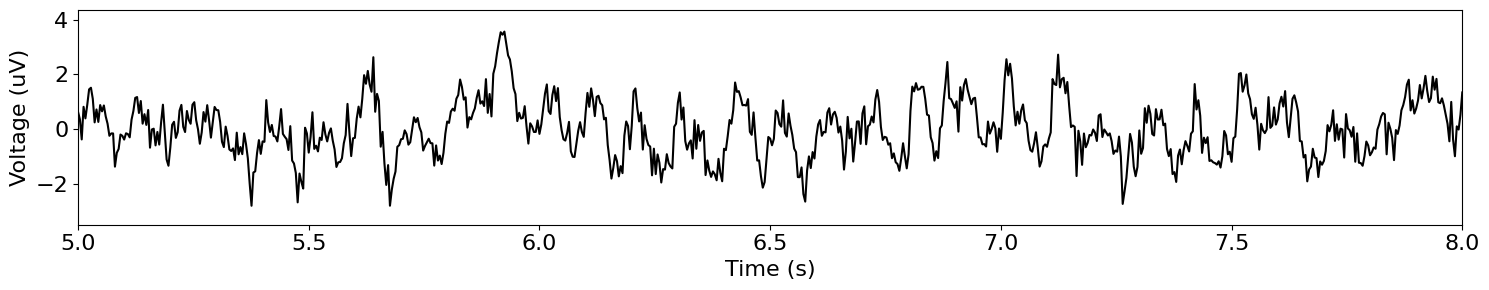

In [5]:
# Visualize a simulated neural time series
plot_time_series(times, examples['combined'], xlim=[5, 8])

## Spectral Parameterization Demo

[specparam](https://fooof-tools.github.io/) is one of the methods that will be investigated in this project. SpecParam is a tool for parameterizing neural power spectra. 

Here we will briefly demonstrate applying spectral parameterization to an example spectrum, to demonstrate the features of the data of interest.

In [6]:
# Compute a power spectrum from the above signal
freqs, powers = compute_spectrum(examples['combined'], FS)

In [7]:
# Initialize and fit a spectral parameterization model
fm = FOOOF(peak_width_limits=[1, 8], min_peak_height=0.1, verbose=False)
fm.fit(freqs, powers, [1, 75])

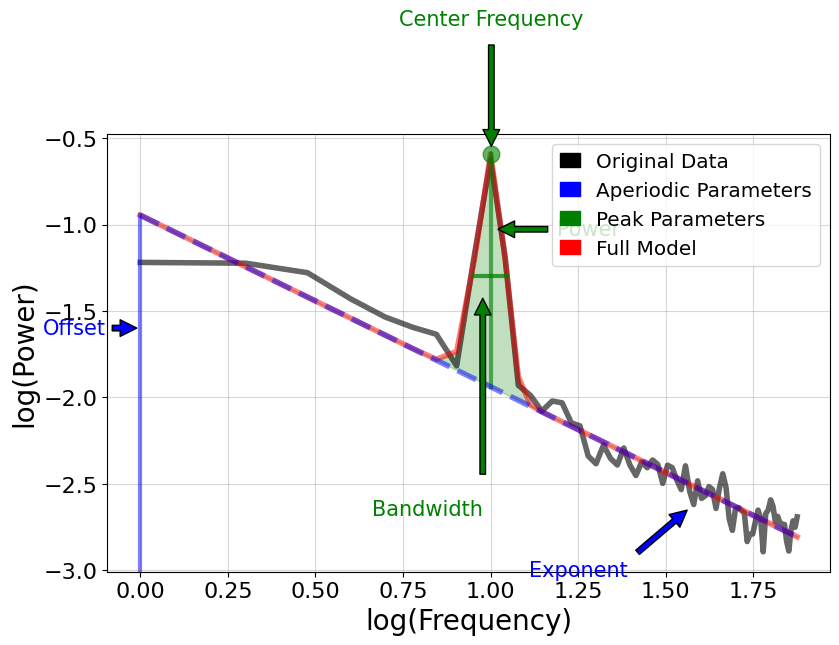

In [8]:
# Visualize an annoted model
plot_annotated_model(fm, True)